In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.pyplot as plt
from matplotlib import style
import re
import csv 
import json 
import ast
from collections import Counter
from urllib.parse import urlparse

In [2]:
tweets = pd.read_csv('tweets_complete.tsv', sep = '\t',index_col = 0, low_memory = False)

In [3]:
tweets.shape

(243268, 21)

In [4]:
tweets.tweet_truncated == 'False'

0        True
1        True
2        True
3        True
4        True
        ...  
4994     True
4995     True
4996    False
4997    False
4998    False
Name: tweet_truncated, Length: 243268, dtype: bool

In [5]:
tweets['tweet_text'] = np.where((tweets.tweet_truncated == 'True'),tweets.tweet_full_text , tweets.tweet_text)

In [6]:
tweets['tweet_text'].tolist()[:5]

['Nigerians are so over COVID, they don’t even bother to wear masks anymore.',
 'Nigerians no even let covid settle. Is it here, is it there until we end am.',
 'Covid was on holiday sha!!!! Awon alase https://t.co/WesAOJK1ls',
 'Covid-19 is backBe careful guys. Use your masks, sanitize and wash your hands regular, and maintain social distancing',
 'COVId in Lagos - quite worrisome https://t.co/pS0lhWF9ZP']

## Covid Data from WHO and CSE

In [7]:
who = pd.read_csv('who_covid_19_global_time_series.csv')

In [8]:
cse = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [9]:
tweets.shape

(243268, 21)

In [10]:
who.shape

(269, 213)

In [11]:
cse.shape

(272, 368)

In [12]:
tweets.head()

,tweet_created_at,tweet_id,tweet_text,tweet_truncated,tweet_source,tweet_in_reply_to_status_id,tweet_in_reply_to_user_id,tweet_in_reply_to_screen_name,tweet_coordinates,tweet_place,...,tweet_full_text,tweet_entities,tweet_lang,tweet_is_quote_status,tweet_is_quote_status_id,tweet_retweeted_status,tweet_favorited,tweet_retweeted,tweet_possibly_sensitive,search_tweets
0,Fri Oct 30 23:48:05 +0000 2020,1322324427653132288,"Nigerians are so over COVID, they don’t even b...",False,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,"{'id': '01ed1f9a43bfb9bd', 'url': 'https://api...",...,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,False,NaN,NaN,False,False,NaN,Covid
1,Fri Oct 30 23:08:10 +0000 2020,1322314381926010880,Nigerians no even let covid settle. Is it here...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,"{'id': '01ed1f9a43bfb9bd', 'url': 'https://api...",...,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,False,NaN,NaN,False,False,NaN,Covid
2,Fri Oct 30 22:44:29 +0000 2020,1322308420842770433,Covid was on holiday sha!!!! Awon alase https:...,False,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,"{'id': '0056091e32b465d6', 'url': 'https://api...",...,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,True,1322302630962614274,NaN,False,False,True,Covid
3,Fri Oct 30 22:43:42 +0000 2020,1322308224654151681,Covid-19 is backBe careful guys. Use your mask...,False,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,"{'id': '01eddd9d0dbec2c8', 'url': 'https://api...",...,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,False,NaN,NaN,False,False,NaN,Covid
4,Fri Oct 30 22:38:25 +0000 2020,1322306894581649415,COVId in Lagos - quite worrisome https://t.co/...,False,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,"{'id': '01eddd9d0dbec2c8', 'url': 'https://api...",...,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,True,1322299982272208901,NaN,False,False,False,Covid


In [13]:
tweets.tweet_text.str.startswith('RT').sum()

57513

In [14]:
tweets['Date'] = pd.to_datetime(tweets['tweet_created_at']).dt.date
tweets['time'] = pd.to_datetime(tweets['tweet_created_at']).dt.time
tweets['month'] = pd.to_datetime(tweets['tweet_created_at']).dt.month

In [15]:
covid_ng =cse[cse['Country/Region'] == 'Nigeria']
covid_ng= covid_ng.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
        var_name="Date", 
        value_name="Num_cases")

In [16]:
covid_ng.tail()

,Province/State,Country/Region,Lat,Long,Date,Num_cases
359,NaN,Nigeria,9.082,8.6753,1/15/21,107345
360,NaN,Nigeria,9.082,8.6753,1/16/21,108943
361,NaN,Nigeria,9.082,8.6753,1/17/21,110387
362,NaN,Nigeria,9.082,8.6753,1/18/21,112004
363,NaN,Nigeria,9.082,8.6753,1/19/21,113305


In [113]:
#covid_ng = covid_ng.dropna(subset = ['Num_cases'])

In [17]:
covid_ng['Date'] = pd.to_datetime(covid_ng['Date']).dt.date
covid_ng['Month'] = pd.to_datetime(covid_ng['Date']).dt.month

In [18]:
tweet_counts = tweets[['Date','tweet_created_at']].groupby(['Date']).count()

In [19]:
tweet_counts.shape

(294, 1)

In [20]:
min(tweets['Date'])

datetime.date(2020, 1, 1)

In [21]:
covid_all = cse.sum().tolist()[3:368]
covid_ng['global_cases'] = covid_all

In [22]:
covid_ng.head

<bound method NDFrame.head of     Province/State Country/Region    Lat    Long        Date  Num_cases  \
0              NaN        Nigeria  9.082  8.6753  2020-01-22          0   
1              NaN        Nigeria  9.082  8.6753  2020-01-23          0   
2              NaN        Nigeria  9.082  8.6753  2020-01-24          0   
3              NaN        Nigeria  9.082  8.6753  2020-01-25          0   
4              NaN        Nigeria  9.082  8.6753  2020-01-26          0   
..             ...            ...    ...     ...         ...        ...   
359            NaN        Nigeria  9.082  8.6753  2021-01-15     107345   
360            NaN        Nigeria  9.082  8.6753  2021-01-16     108943   
361            NaN        Nigeria  9.082  8.6753  2021-01-17     110387   
362            NaN        Nigeria  9.082  8.6753  2021-01-18     112004   
363            NaN        Nigeria  9.082  8.6753  2021-01-19     113305   

     Month  global_cases  
0        1           557  
1        1     

In [23]:
covid_ng_counts = covid_ng[['Date','Num_cases','global_cases']]
covid_ng_counts.set_index('Date')

,Num_cases,global_cases
Date,,
2020-01-22,0,557
2020-01-23,0,655
2020-01-24,0,941
2020-01-25,0,1433
2020-01-26,0,2118
...,...,...
2021-01-15,107345,93876206
2021-01-16,108943,94495403
2021-01-17,110387,95045634


In [24]:
#tweet_counts.iloc[12:161,] 
covid_ng_counts = covid_ng_counts.iloc[:283,]

In [25]:
tweet_counts.shape

(294, 1)

In [26]:
covid_ng_counts.shape

(283, 3)

In [27]:
list1 = [0.0] * 11 
#list2 = [0.0] * 132
covid_cases_ng = list1 + covid_ng_counts['Num_cases'].tolist() 
new_cases_ng = list1 + covid_ng_counts['Num_cases'].diff().fillna(covid_ng_counts['Num_cases']).tolist()
covid_cases_all = list1 + covid_ng_counts['global_cases'].tolist() 
new_cases_all = list1 + covid_ng_counts['global_cases'].diff().fillna(covid_ng_counts['global_cases']).tolist()

In [28]:
tweet_counts['covid_cases_ng'] = covid_cases_ng

In [29]:
tweet_counts['new_cases_ng'] = new_cases_ng

In [30]:
tweet_counts[['new_cases_ng']].max()

new_cases_ng    790.0
dtype: float64

In [31]:
tweet_counts['covid_cases_all'] = covid_cases_all

In [32]:
tweet_counts['new_cases_all'] = new_cases_all

In [33]:
tweets['tweet_replies'] = np.where(tweets['tweet_in_reply_to_user_id' ] != 'None', 1,0)
tweet_reply_counts = tweets[['Date','tweet_replies']].groupby(['Date']).sum()

In [34]:
tweets[['tweet_replies']].sum()/tweets[['tweet_replies']].shape[0]

tweet_replies    0.233812
dtype: float64

In [36]:
tweet_ent_list = tweets['tweet_entities'].tolist()
tweet_user_info = tweets['tweet_user'].tolist()
user_ids = []    
urls = []
for i in range(len(tweet_ent_list)):
    #if i % 10 == 0:
    #    print(i)
    raw_string = r'{0}'.format(tweet_ent_list[i])
    json_formated = json.dumps(raw_string)
    json_final = json.loads(json_formated)
    url_dict = eval(json_final) 
    
    raw_string = r'{0}'.format(tweet_user_info[i])
    json_formated = json.dumps(raw_string)
    json_final = json.loads(json_formated)
    user_dict = eval(json_final) 
    
    try: 
        if type(url_dict) == bool: 
            urls.append(0)
        elif len(url_dict.get('urls')[0]) == 0:
            urls.append(0)
        elif url_dict.get('urls')[0] is None: 
            urls.append(0)
        elif url_dict.get('urls')[0].get('unwound') is None: 
            urls.append(0)
        else: 
            url = url_dict.get('urls')[0].get('unwound').get('url')
            urls.append(url)
            
    except IndexError: 
        urls.append(0)
        pass
    
    try: 
        if type(user_dict) == bool: 
            user_ids.append(0)
        elif user_dict.get('id') == 0:
            user_ids.append(0)
        elif user_dict.get('id') is None: 
            user_ids.append(0)
        else: 
            ids = user_dict.get('id')
            user_ids.append(ids)
    except IndexError: 
        user_ids.append(0)
        pass
    

In [37]:
url_count = 0 
for u in urls: 
    if u != 0: 
        url_count += 1         
print('Percentage of tweets with URLS: ' + str(round(url_count/tweets.shape[0]*100,1)) + '%')

Percentage of tweets with URLS: 6.6%


In [38]:
tweets['tweet_urls'] = urls
tweets['user_ids'] = user_ids

In [39]:
urls_users = tweets[['tweet_urls' , 'user_ids']][tweets.tweet_urls != 0]

In [40]:
tweets['tweet_urls_counts'] = np.where(tweets['tweet_urls' ] != 0, 1,0)
tweet_urls_counts = tweets[['Date','tweet_urls']].groupby(['Date']).sum()

# Plots of Tweet Volume and Number of Cases

In [136]:
case_dates = []
for i in range(len(tweet_counts)): 
    if tweet_counts['new_cases_ng'][i] > 0.0: 
        case_dates.append(tweet_counts['new_cases_ng'].index.values[i])
        

In [137]:
first_case = case_dates[0]

In [138]:
tweet_counts['new_cases_ng'][first_case]

1.0

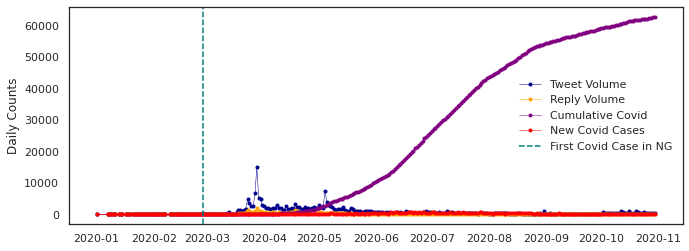

In [139]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'],marker='.', color = 'DarkBlue',linestyle='-', linewidth=0.5, label='Tweet Volume')
    ax.plot(tweet_reply_counts['tweet_replies'],marker='.', color = 'orange',linestyle='-', linewidth=0.5,label='Reply Volume')
    ax.plot(tweet_counts['covid_cases_ng'],marker='.', color = 'purple', linestyle='-', linewidth=0.5,label='Cumulative Covid')
    ax.plot(tweet_counts['new_cases_ng'],marker='.', color = 'red', linestyle='-', linewidth=0.5,label='New Covid Cases')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Counts')
    ax.legend();

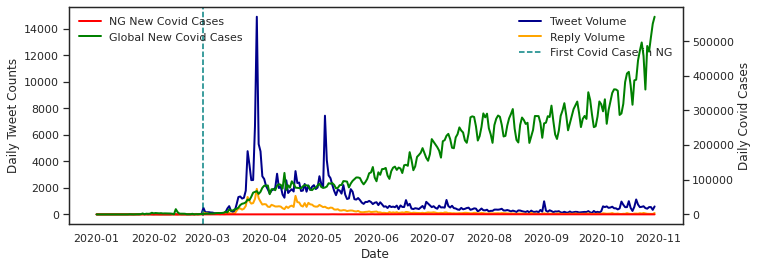

In [140]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'],color = 'DarkBlue', linestyle='-', linewidth=2, label='Tweet Volume')
    ax.plot(tweet_reply_counts['tweet_replies'], color = 'orange',linestyle='-', linewidth=2,label='Reply Volume')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax2 = tweet_counts['new_cases_ng'].plot(secondary_y= True, color = 'red',linestyle='-', linewidth=2,label='NG New Covid Cases',
                                            ax = ax)
    ax2 = tweet_counts['new_cases_all'].plot(secondary_y = True, color = 'green',linestyle='-', 
                                             linewidth=2,label='Global New Covid Cases', ax = ax)
    ax.set_ylabel('Daily Tweet Counts')
    ax2.set_ylabel('Daily Covid Cases')
    ax.legend()
    ax2.legend();

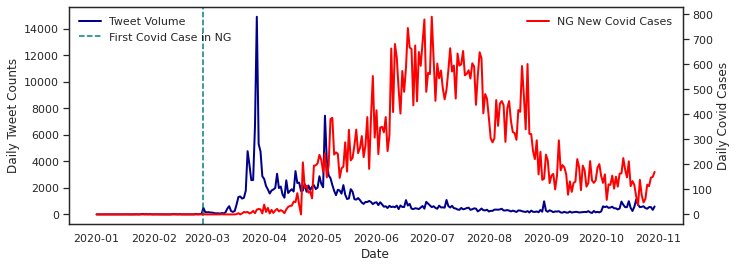

In [141]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'],color = 'DarkBlue', linestyle='-', linewidth=2, label='Tweet Volume')
    #ax.plot(tweet_reply_counts['tweet_replies'],marker='.', color = 'orange',linestyle='-', linewidth=0.5,label='Reply Volume')
    #ax.plot(tweet_counts['new_cases_ng'],marker='.', color = 'red',linestyle='-', linewidth=0.5,label='NG New Covid Cases')
    ax2 = tweet_counts['new_cases_ng'].plot(secondary_y= True, color = 'red',linestyle='-', linewidth=2,label='NG New Covid Cases'
                                        , ax = ax)
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.legend(loc = 'upper left');
    ax2.legend(loc = 'upper right')

ax.set_ylabel('Daily Tweet Counts')
ax2.set_ylabel('Daily Covid Cases');


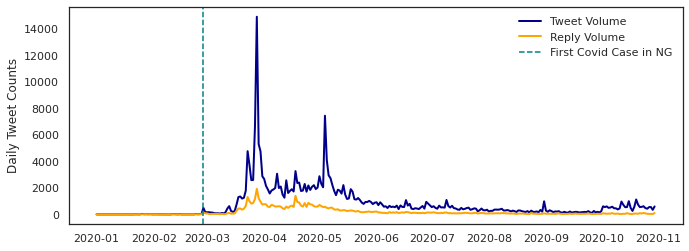

In [142]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    #ax.plot(tweet_counts['covid_cases_ng'],marker='.', color = 'purple', linestyle='-', linewidth=0.5,label='Cumulative Covid Cases')
    ax.plot(tweet_counts['tweet_created_at'], color = 'DarkBlue',linestyle='-', linewidth=2, label='Tweet Volume')
    ax.plot(tweet_reply_counts['tweet_replies'], color = 'orange', linestyle='-', linewidth=2,label='Reply Volume')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Tweet Counts')
    ax.legend();

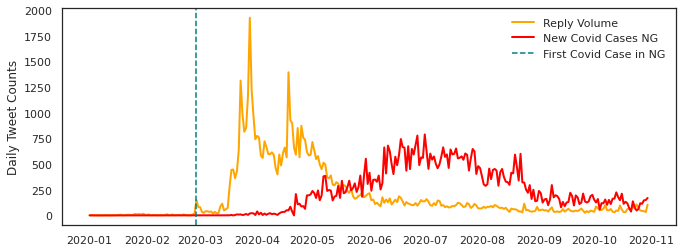

In [143]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_reply_counts['tweet_replies'], linestyle='-', color = 'orange', linewidth=2,label='Reply Volume')
    ax.plot(tweet_counts['new_cases_ng'], linestyle='-', color = 'red',linewidth=2,label='New Covid Cases NG')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Tweet Counts')
    ax.legend();

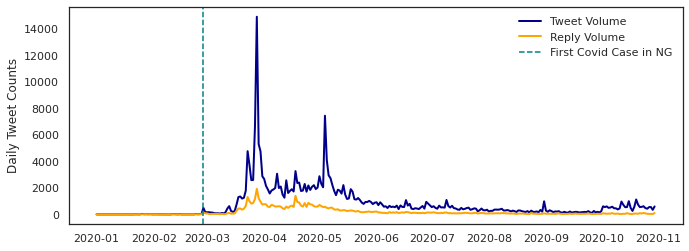

In [145]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'], color = 'DarkBlue',linestyle='-', linewidth=2, label='Tweet Volume')
    ax.plot(tweet_reply_counts['tweet_replies'], linestyle='-', color = 'orange', linewidth=2,label='Reply Volume')
    #ax.plot(tweet_url_counts['tweet_urls'], linestyle='-', color = 'deepskyblue',linewidth=2,label='URL Volume')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Tweet Counts')
    ax.legend();

# Correlations Between Tweet Volume and New Covid Cases Nigeria

In [282]:
tweet_counts.corr()

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
tweet_created_at,1.000000,-0.292569,-0.111454,-0.237479,-0.163163
covid_cases_ng,-0.292569,1.000000,0.337999,0.967166,0.940972
new_cases_ng,-0.111454,0.337999,1.000000,0.196934,0.383387
covid_cases_all,-0.237479,0.967166,0.196934,1.000000,0.948694
new_cases_all,-0.163163,0.940972,0.383387,0.948694,1.000000


In [146]:
lagged_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['new_cases_ng'].shift(-t)) for t in range(4)] for x in tweet_counts.columns})

In [147]:
lagged_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.111454,-0.111454,-0.111454,-0.111454,-0.111454
1,-0.105193,-0.105193,-0.105193,-0.105193,-0.105193
2,-0.095285,-0.095285,-0.095285,-0.095285,-0.095285
3,-0.078008,-0.078008,-0.078008,-0.078008,-0.078008


In [148]:
lead_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['new_cases_ng'].shift(t)) for t in range(4)] for x in tweet_counts.columns})

In [149]:
lead_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.111454,-0.111454,-0.111454,-0.111454,-0.111454
1,-0.125427,-0.125427,-0.125427,-0.125427,-0.125427
2,-0.133041,-0.133041,-0.133041,-0.133041,-0.133041
3,-0.140262,-0.140262,-0.140262,-0.140262,-0.140262


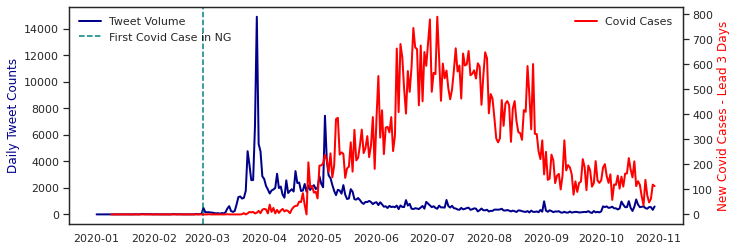

In [150]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'], linestyle='-', color = "DarkBlue",linewidth=2,label='Tweet Volume')
    ax.set_ylabel('Daily Tweet Counts',color="DarkBlue")
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax2=ax.twinx()
    ax2.plot(tweet_counts['new_cases_ng'].shift(3), linestyle='-',color ="red", linewidth=2,label='Covid Cases')
    ax2.set_ylabel('New Covid Cases - Lead 3 Days', color = "red") 
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right');

# Correlations Between Tweet Volume and Cumulative Covid Cases Nigeria

In [151]:
lagged_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['covid_cases_ng'].shift(-t)) for t in range(4)] for x in tweet_counts.columns})

In [152]:
lagged_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.292569,-0.292569,-0.292569,-0.292569,-0.292569
1,-0.293017,-0.293017,-0.293017,-0.293017,-0.293017
2,-0.292347,-0.292347,-0.292347,-0.292347,-0.292347
3,-0.292361,-0.292361,-0.292361,-0.292361,-0.292361


In [153]:
lead_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['covid_cases_ng'].shift(t)) for t in range(4)] for x in tweet_counts.columns})

In [154]:
lead_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.292569,-0.292569,-0.292569,-0.292569,-0.292569
1,-0.295160,-0.295160,-0.295160,-0.295160,-0.295160
2,-0.297658,-0.297658,-0.297658,-0.297658,-0.297658
3,-0.300111,-0.300111,-0.300111,-0.300111,-0.300111


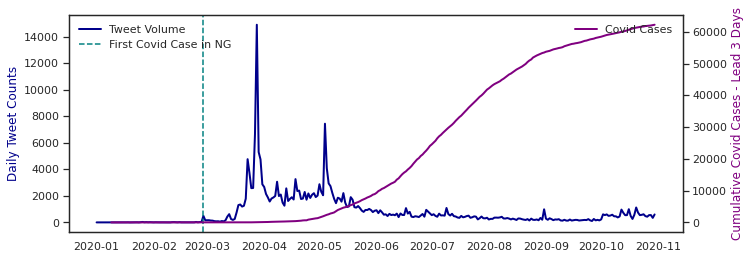

In [155]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'], linestyle='-', color = "DarkBlue",linewidth=2,label='Tweet Volume')
    ax.set_ylabel('Daily Tweet Counts',color="DarkBlue")
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax2=ax.twinx()
    ax2.plot(tweet_counts['covid_cases_ng'].shift(3), linestyle='-',color ="purple", linewidth=2,label='Covid Cases')
    ax2.set_ylabel('Cumulative Covid Cases - Lead 3 Days', color = "purple")
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right');

# Correlation Between Nigerian Tweets and New Covid Cases Globally

In [156]:
lagged_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['new_cases_all'].shift(-t)) for t in range(4)] for x in tweet_counts.columns})

In [157]:
lagged_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.163163,-0.163163,-0.163163,-0.163163,-0.163163
1,-0.161778,-0.161778,-0.161778,-0.161778,-0.161778
2,-0.155181,-0.155181,-0.155181,-0.155181,-0.155181
3,-0.151600,-0.151600,-0.151600,-0.151600,-0.151600


In [158]:
lead_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['new_cases_all'].shift(t)) for t in range(4)] for x in tweet_counts.columns})

In [159]:
lead_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.163163,-0.163163,-0.163163,-0.163163,-0.163163
1,-0.170614,-0.170614,-0.170614,-0.170614,-0.170614
2,-0.177752,-0.177752,-0.177752,-0.177752,-0.177752
3,-0.185345,-0.185345,-0.185345,-0.185345,-0.185345


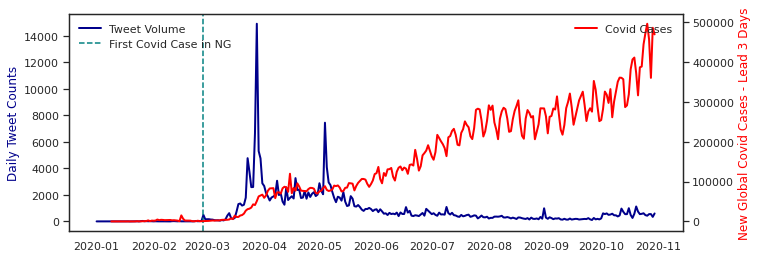

In [160]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'], linestyle='-', color = "DarkBlue",linewidth=2,label='Tweet Volume')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Tweet Counts',color="DarkBlue")
    ax2=ax.twinx()
    ax2.plot(tweet_counts['new_cases_all'].shift(3), linestyle='-',color ="red", linewidth=2,label='Covid Cases')
    ax2.set_ylabel('New Global Covid Cases - Lead 3 Days', color = "red")
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right');

# Correlation Between Nigerian Tweets and Cumulative Covid Cases Globally

In [161]:
lagged_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['covid_cases_all'].shift(-t)) for t in range(4)] for x in tweet_counts.columns})

In [299]:
lagged_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.237479,-0.237479,-0.237479,-0.237479,-0.237479
1,-0.237932,-0.237932,-0.237932,-0.237932,-0.237932
2,-0.236697,-0.236697,-0.236697,-0.236697,-0.236697
3,-0.236738,-0.236738,-0.236738,-0.236738,-0.236738


In [162]:
lead_correlation = pd.DataFrame.from_dict(
    {x: [tweet_counts['tweet_created_at'].corr(tweet_counts['covid_cases_all'].shift(t)) for t in range(4)] for x in tweet_counts.columns})

In [163]:
lead_correlation

,tweet_created_at,covid_cases_ng,new_cases_ng,covid_cases_all,new_cases_all
0,-0.237479,-0.237479,-0.237479,-0.237479,-0.237479
1,-0.240589,-0.240589,-0.240589,-0.240589,-0.240589
2,-0.243674,-0.243674,-0.243674,-0.243674,-0.243674
3,-0.246732,-0.246732,-0.246732,-0.246732,-0.246732


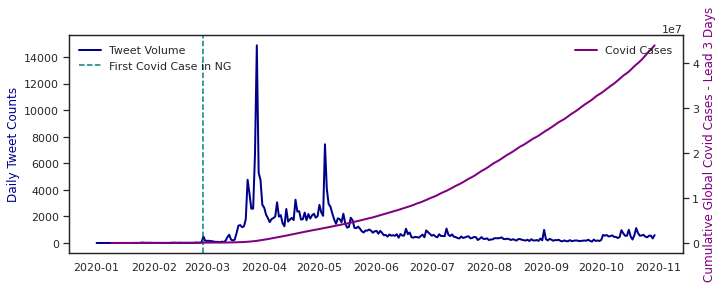

In [164]:
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots()
    ax.plot(tweet_counts['tweet_created_at'], linestyle='-', color = "DarkBlue",linewidth=2,label='Tweet Volume')
    ax.axvline(x = first_case, color = 'teal', linestyle = 'dashed', label = 'First Covid Case in NG')
    ax.set_ylabel('Daily Tweet Counts',color="DarkBlue")
    ax2=ax.twinx()
    ax2.plot(tweet_counts['covid_cases_all'].shift(3), linestyle='-',color ="purple", linewidth=2,label='Covid Cases')
    ax2.set_ylabel('Cumulative Global Covid Cases - Lead 3 Days', color = "purple")
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right');

# URL Analysis

## Top 10 URLS

In [41]:
urls_users.head()

,tweet_urls,user_ids
54,https://chriced.org.ng/2020/10/30/looting-of-c...,4854709180
99,https://www.solacebase.com/2020/10/30/how-cita...,2751526439
118,https://newsscrollngr.com/index.php/component/...,3300692264
135,https://www.instagram.com/p/CG8JgxjhNsM/?igshi...,1240917049318223872
169,https://nigeriantracker.com/2020/10/29/how-cit...,2751526439


In [66]:
#url_counts = Counter(urls)
#url_counts.most_common(10)
url_counts = Counter(urls_users.tweet_urls)
url_counts.most_common(10)

[('https://coronavirusnigeria.ng4n.com/', 2693),
 ('https://www.instagram.com/accounts/login/', 502),
 ('https://www.youtube.com/watch?v=Ih5CyTaNYc4&feature=youtu.be', 53),
 ('https://www.icirnigeria.org/covid-19/', 47),
 ('https://covid19.wellvis.org/', 46),
 ('https://nmfb.com.ng/covid-19-support/', 41),
 ('https://covid19.ncdc.gov.ng/', 40),
 ('https://api.whatsapp.com/', 39),
 ('https://wfm917.com/', 38),
 ('https://api.whatsapp.com/send/?phone=2348078834994&text&app_absent=0', 29)]

In [54]:
domain = urlparse('https://coronavirusnigeria.ng4n.com/').netloc
print(domain)

coronavirusnigeria.ng4n.com


In [67]:
#domains = []
#for k, v in url_counts.items(): 
#    domain = urlparse(k).netloc
#    domains.append(domain.lower())

In [42]:
domains = []
for k in range(urls_users.shape[0]): 
    domain = urlparse(urls_users.iloc[k,0]).netloc
    domains.append(domain.lower())

## Top 10 Domains

In [58]:
domain_counts = Counter(domains)
domain_counts.most_common(5)

[('coronavirusnigeria.ng4n.com', 4606),
 ('www.instagram.com', 574),
 ('www.youtube.com', 417),
 ('www.theforefrontmedia.org', 243),
 ('www.jordanib.com', 168)]

In [61]:
domain_counts.most_common()[-5:]

[('on.now', 1),
 ('www.musicbed.com', 1),
 ('madam.you', 1),
 ('strictlyherbsherbalist.org', 1),
 ('www.indy100.com', 1)]

In [63]:
df = pd.DataFrame.from_dict(domain_counts, orient='index').reset_index()

In [66]:
df = df.rename(columns={'index':'domain', 0:'count'})

In [67]:
df.to_csv('domain_counts.csv')

#### Make sure url counts are not from single user (but unique)

In [43]:
urls_users['tweet_domains'] = domains

In [44]:
urls_users = urls_users.drop(columns = ['tweet_urls'])
urls_users.head()

,user_ids,tweet_domains
54,4854709180,chriced.org.ng
99,2751526439,www.solacebase.com
118,3300692264,newsscrollngr.com
135,1240917049318223872,www.instagram.com
169,2751526439,nigeriantracker.com


In [45]:
len(list(np.unique(domains)))
unique_domains = list(np.unique(domains))

In [46]:
domain_unique_counts = pd.DataFrame({'domains' : unique_domains})

In [51]:
domain_unique_counts['counts'] = unique_domains
domain_unique_counts.iloc[0,1] = 0
domain_unique_counts.head()

,domains,counts
0,,0
1,1.pm,1.pm
2,1.social,1.social
3,101.fm,101.fm
4,180nobs.com,180nobs.com


In [52]:
print(domain_unique_counts.shape)
print(urls_users.shape)

(1537, 2)
(16098, 2)


In [53]:
i = -1
for unique_domain in unique_domains: 
    i += 1
    user_list = []
    for idx, row in urls_users.iterrows():
        if unique_domain == row['tweet_domains']: 
            dk = row['user_ids']
            user_list.append(dk)
    domain_unique_counts.iloc[i,1] = len(user_list)        

In [59]:
domain_unique_counts_sorted = domain_unique_counts.sort_values(by=['counts'])

In [65]:
domain_unique_counts.sort_values(by='counts', ascending = True)

,domains,counts
0,,0
879,theglittersonline.com.ng,1
880,thegospel.ng,1
882,thehackernews.com,1
883,theheadlinenewsonline.blogspot.com,1
...,...,...
1199,www.jordanib.com,169
1510,www.youtube.com,537
1432,www.theforefrontmedia.org,627
1187,www.instagram.com,1083


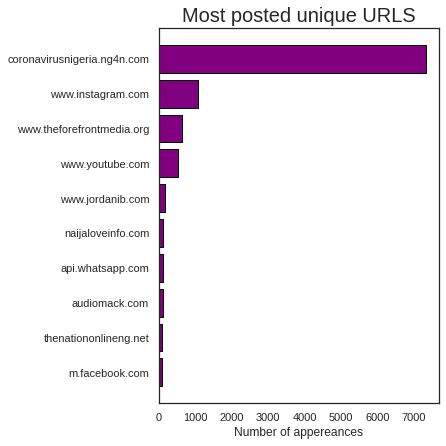

In [63]:
#Plotting a graph with the most used hashtags
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(domain_unique_counts_sorted['counts'])[-10:]))
    ax.barh(y_pos,list(domain_unique_counts_sorted['counts'])[-10:], align='center', color = 'purple', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(domain_unique_counts_sorted['domains'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most posted unique URLS", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

## Intersection between Domains and Newsguard Links? None

In [341]:
newsguard_domains = pd.read_csv('NewsGuard_links.csv', header = None, names = ["links"])

In [350]:
links = newsguard_domains['links'].str.lower().tolist()

In [372]:
# remove text in parenthese for some domains 
fixed_links = []
for link in links: 
    modified_link = re.sub(r" \([^()]*\)", "", link)
    fixed_links.append(modified_link)

In [374]:
fixed_links[400]

'24jours.com'

In [383]:
fixed_domains = domains[1:]

In [385]:
fixed_domains[0]

'chriced.org.ng'

In [386]:
not set(fixed_domains).isdisjoint(fixed_links)

False

In [387]:
bool(set(fixed_domains) & set(fixed_links))

False

In [388]:
any(i in fixed_domains for i in fixed_links)

False

In [397]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [398]:
print(intersection(fixed_domains, fixed_links))

[]


## Intersection between Newsgaurd and Misinfo Keywords? 

In [399]:
f = open('covid_keywords.txt', 'r+')
covid_keywords = [keyword.lower().strip('\n') for keyword in f.readlines()]
f.close()

print(covid_keywords)

['5g', 'alcohol', 'antibiotics', 'bleach', 'cold weather', 'snow', 'dexamethasone', 'drugs', 'garlic', 'hand dryers', 'holding your breath', 'hot climates', 'humid climates', 'hot weather', 'hot baths', 'hot peppers', 'houseflies', 'hydroxychloroquine', 'chloroquine', 'mask', 'co2 intoxication', 'exercise', 'medicines', 'methanol', 'ethanol', 'misinformation', 'mosquitoes', 'older people', 'old people', 'young people', 'younger people', 'pneumonia vaccines', 'recovery', 'recover', 'infection', 'saline', 'salt', 'shoes', 'sunny weather', 'hot weather', 'supplements', 'vitamins', 'minerals', 'swimming', 'thermal', 'scanners', 'ultra-violet (uv) lamps', 'viruses', 'bacteria', 'antibiotics', 'infodemic', 'disinformation', 'plandemic', 'vaccine', 'cure', 'chloroquine']


In [408]:
fixed_links[:10]

['activistpost.com',
 'ageofautism.com',
 'althealthworks.com',
 'americanactionnews.com',
 'americafirstprojects.com',
 'americasfrontlinedoctorsummit.com',
 'americanthinker.com',
 'anthonyblogan.com',
 'banned.video',
 'bb4sp.com']

## Top Hashtags per Month

In [54]:
jan = tweets[tweets['month'] == 1]
feb = tweets[tweets['month'] == 2]
mar = tweets[tweets['month'] == 3]
apr = tweets[tweets['month'] == 4]
may = tweets[tweets['month'] == 5]
june = tweets[tweets['month'] == 6]
july = tweets[tweets['month'] == 7]
aug = tweets[tweets['month'] == 8]
sep = tweets[tweets['month'] == 9]
octo = tweets[tweets['month'] == 10]
nov = tweets[tweets['month'] == 11]
dec = tweets[tweets['month'] == 12]
tweets_by_month = [jan,feb,mar,apr,may,june,july,aug,sep,octo,nov,dec]

In [84]:
list_of_months = ['january',
                  'february',
                  'march',
                  'april',
                  'may',
                  'june',
                  'july',
                  'august',
                  'september',
                  'october',
                  'november',
                  'december'
                ]

In [85]:
len(list_of_months)

12

In [90]:
hashtag_months_dict = {}
for j in range(len(tweets_by_month)):
    tweet_ent_list = tweets_by_month[j]['tweet_entities'].tolist()
    hashtags = []
    for i in range(len(tweet_ent_list)):
        #if i % 10 == 0:
        #    print(i)
        raw_string = r'{0}'.format(tweet_ent_list[i])
        json_formated = json.dumps(raw_string)
        json_final = json.loads(json_formated)
        hashtag_dict = eval(json_final) 
        try: 
            if type(hashtag_dict) == bool: 
                pass
            #elif user_dict.get('id') == 0:
            #    user_ids.append(0)
            #elif user_dict.get('id') is None: 
            #    user_ids.append(0)
            else: 
                if len(hashtag_dict.get('hashtags')) == 0:
                    #hashtags.append(0)
                    pass
                else:
                    for k in range(len(hashtag_dict.get('hashtags'))): 
                        hashtags.append(hashtag_dict.get('hashtags')[k].get('text'))
        except IndexError: 
            #hashtag_dict.append(0)
            pass
    data = {list_of_months[j]: hashtags}
    hashtag_months_dict.update(data)

In [126]:
jan_hashtag_counts = Counter(hashtag_months_dict.get('january'))
df_jan_hashtag_counts = pd.DataFrame.from_dict(jan_hashtag_counts, orient='index').reset_index()
df_jan_hashtag_counts = df_jan_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_jan_hashtag_counts = df_jan_hashtag_counts.sort_values(by = 'count')
#df_jan_hashtag_counts.head()

,hashtag,count
0,coronarvirues,1
28,NetworkNews,1
30,Ebonyi,1
31,TodayInNCDC,1
33,Lagos,1


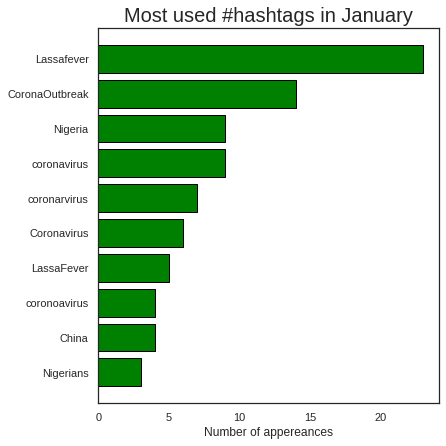

In [134]:
#Plotting a graph with the most used hashtags
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_jan_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_jan_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_jan_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in January", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

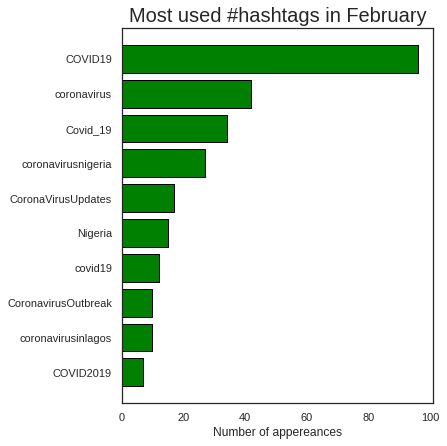

In [133]:
feb_hashtag_counts = Counter(hashtag_months_dict.get('february'))
df_feb_hashtag_counts = pd.DataFrame.from_dict(feb_hashtag_counts, orient='index').reset_index()
df_feb_hashtag_counts = df_feb_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_feb_hashtag_counts = df_feb_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_feb_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_feb_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_feb_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in February", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


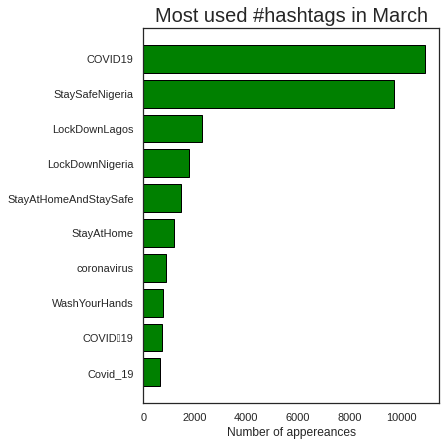

In [136]:
mar_hashtag_counts = Counter(hashtag_months_dict.get('march'))
df_mar_hashtag_counts = pd.DataFrame.from_dict(mar_hashtag_counts, orient='index').reset_index()
df_mar_hashtag_counts = df_mar_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_mar_hashtag_counts = df_mar_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_mar_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_mar_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_mar_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in March", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

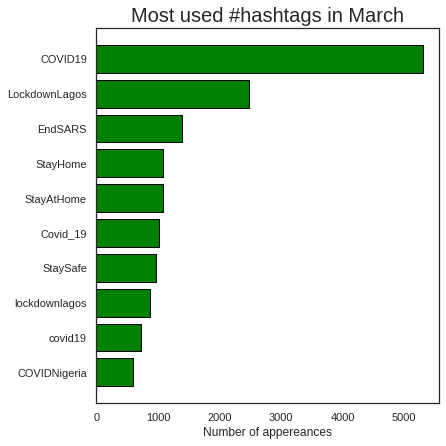

In [137]:
apr_hashtag_counts = Counter(hashtag_months_dict.get('april'))
df_apr_hashtag_counts = pd.DataFrame.from_dict(apr_hashtag_counts, orient='index').reset_index()
df_apr_hashtag_counts = df_apr_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_apr_hashtag_counts = df_apr_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_apr_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_apr_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_apr_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in April", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

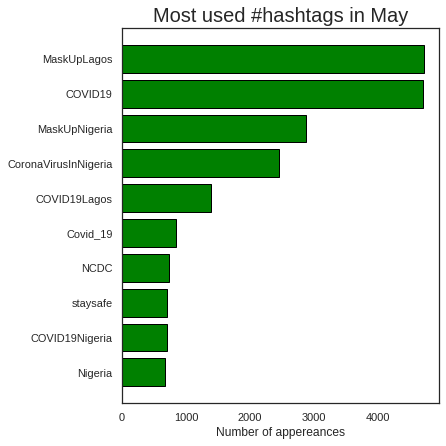

In [138]:
may_hashtag_counts = Counter(hashtag_months_dict.get('may'))
df_may_hashtag_counts = pd.DataFrame.from_dict(may_hashtag_counts, orient='index').reset_index()
df_may_hashtag_counts = df_may_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_may_hashtag_counts = df_may_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_may_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_may_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_may_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in May", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

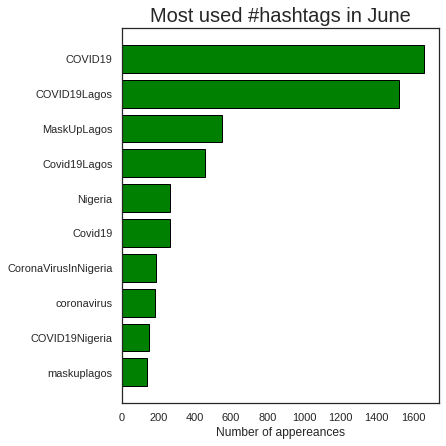

In [140]:
jun_hashtag_counts = Counter(hashtag_months_dict.get('june'))
df_jun_hashtag_counts = pd.DataFrame.from_dict(jun_hashtag_counts, orient='index').reset_index()
df_jun_hashtag_counts = df_jun_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_jun_hashtag_counts = df_jun_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_jun_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_jun_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_jun_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in June", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

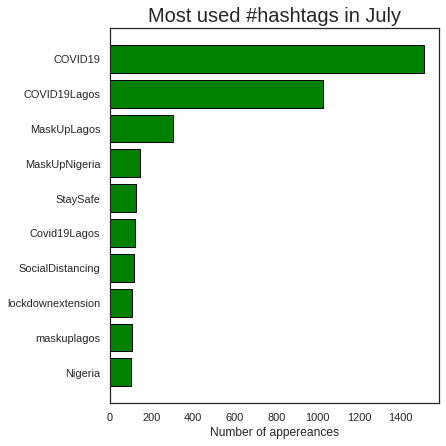

In [141]:
jul_hashtag_counts = Counter(hashtag_months_dict.get('july'))
df_jul_hashtag_counts = pd.DataFrame.from_dict(jul_hashtag_counts, orient='index').reset_index()
df_jul_hashtag_counts = df_jul_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_jul_hashtag_counts = df_jul_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_jul_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_jul_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_jul_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in July", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

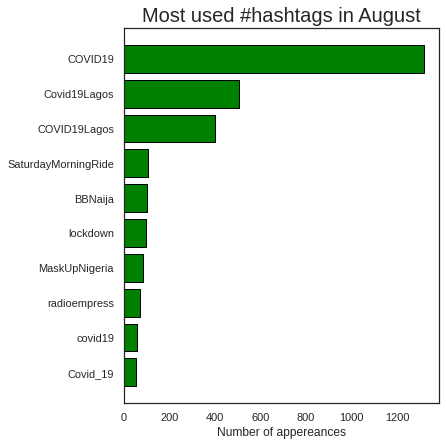

In [142]:
aug_hashtag_counts = Counter(hashtag_months_dict.get('august'))
df_aug_hashtag_counts = pd.DataFrame.from_dict(aug_hashtag_counts, orient='index').reset_index()
df_aug_hashtag_counts = df_aug_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_aug_hashtag_counts = df_aug_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_aug_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_aug_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_aug_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in August", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

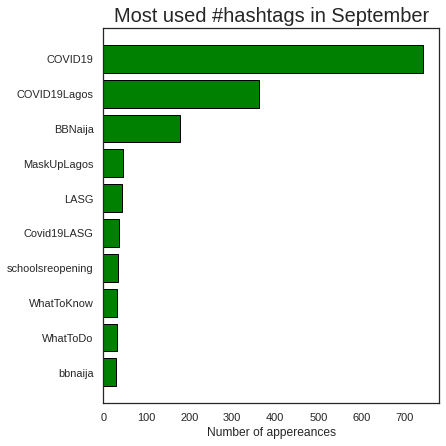

In [143]:
sep_hashtag_counts = Counter(hashtag_months_dict.get('september'))
df_sep_hashtag_counts = pd.DataFrame.from_dict(sep_hashtag_counts, orient='index').reset_index()
df_sep_hashtag_counts = df_sep_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_sep_hashtag_counts = df_sep_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_sep_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_sep_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_sep_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in September", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

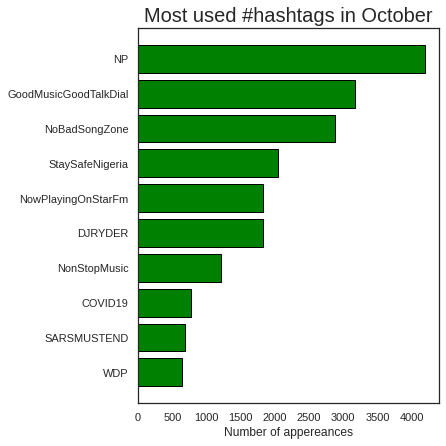

In [144]:
oct_hashtag_counts = Counter(hashtag_months_dict.get('october'))
df_oct_hashtag_counts = pd.DataFrame.from_dict(oct_hashtag_counts, orient='index').reset_index()
df_oct_hashtag_counts = df_oct_hashtag_counts.rename(columns={'index':'hashtag', 0:'count'})
df_oct_hashtag_counts = df_oct_hashtag_counts.sort_values(by = 'count')
with plt.style.context('seaborn-ticks'):
    fig, ax = plt.subplots(figsize = (7,7))
    y_pos = np.arange(len(list(df_oct_hashtag_counts['count'])[-10:]))
    ax.barh(y_pos,list(df_oct_hashtag_counts['count'])[-10:], align='center', color = 'green', edgecolor = 'black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(df_oct_hashtag_counts['hashtag'])[-10:])
    ax.set_xlabel("Number of appereances")
    ax.set_title("Most used #hashtags in October", fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()